In [106]:
import numpy as np
import pandas as pd 
import warnings

import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
from scipy.stats import zscore

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,accuracy_score,confusion_matrix,recall_score,precision_score,f1_score, auc

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

In [107]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/bank-full.csv%20(Ensemble%20Techniques)/bank-full.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [108]:
df.shape

(45211, 17)

In [109]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [111]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [112]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [113]:
cols = [col for col in df.columns]
col_with_unknown_value = []
for col in cols:
    if 'unknown' in df[col].values:
        col_with_unknown_value.append(col)
        
print("Columns with Unknown Values -",col_with_unknown_value)       

Columns with Unknown Values - ['job', 'education', 'contact', 'poutcome']


<ipython-input-113-2fd1d0c1a418>:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'unknown' in df[col].values:


In [114]:
print("Unknown values count : \n")
for col in col_with_unknown_value:
    print(col," : ",df[df[col].str.contains('unknown')][col].count())

Unknown values count : 

job  :  288
education  :  1857
contact  :  13020
poutcome  :  36959


In [115]:
print("Other values count in attributes having unknown values -\n")
for col in col_with_unknown_value:
    print("===",col,"===")
    print(df.groupby(df[col])[col].count(),"\n")

Other values count in attributes having unknown values -

=== job ===
job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: job, dtype: int64 

=== education ===
education
primary       6851
secondary    23202
tertiary     13301
unknown       1857
Name: education, dtype: int64 

=== contact ===
contact
cellular     29285
telephone     2906
unknown      13020
Name: contact, dtype: int64 

=== poutcome ===
poutcome
failure     4901
other       1840
success     1511
unknown    36959
Name: poutcome, dtype: int64 



In [116]:
for i in df.columns:
  print(i," :-")
  print(df[i].unique())
  print('==='*25)

age  :-
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job  :-
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital  :-
['married' 'single' 'divorced']
education  :-
['tertiary' 'secondary' 'unknown' 'primary']
default  :-
['no' 'yes']
balance  :-
[ 2143    29     2 ...  8205 14204 16353]
housing  :-
['yes' 'no']
loan  :-
['no' 'yes']
contact  :-
['unknown' 'cellular' 'telephone']
day  :-
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month  :-
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration  :-
[ 261  151   76 ... 1298 1246 1556]
campaign  :-
[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21

In [117]:
df.apply(lambda x: len(x.unique()))

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [118]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [119]:
numerical_cols = list(df.select_dtypes(exclude=['object']))
numerical_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [120]:
df[numerical_cols].head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [121]:
category_cols = list(df.select_dtypes(include=['object']))
category_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'Target']

In [122]:
target='Target'
non_features=[target]
cat_features=[col for col in df.select_dtypes('object').columns if col not in non_features]
num_features=[col for col in df.select_dtypes(np.number).columns if col not in non_features]

print("Categorical Features :\n",cat_features,"\n")
print("Numerical Features :\n",num_features)

Categorical Features :
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'] 

Numerical Features :
 ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [123]:
df[cat_features].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome
count,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959


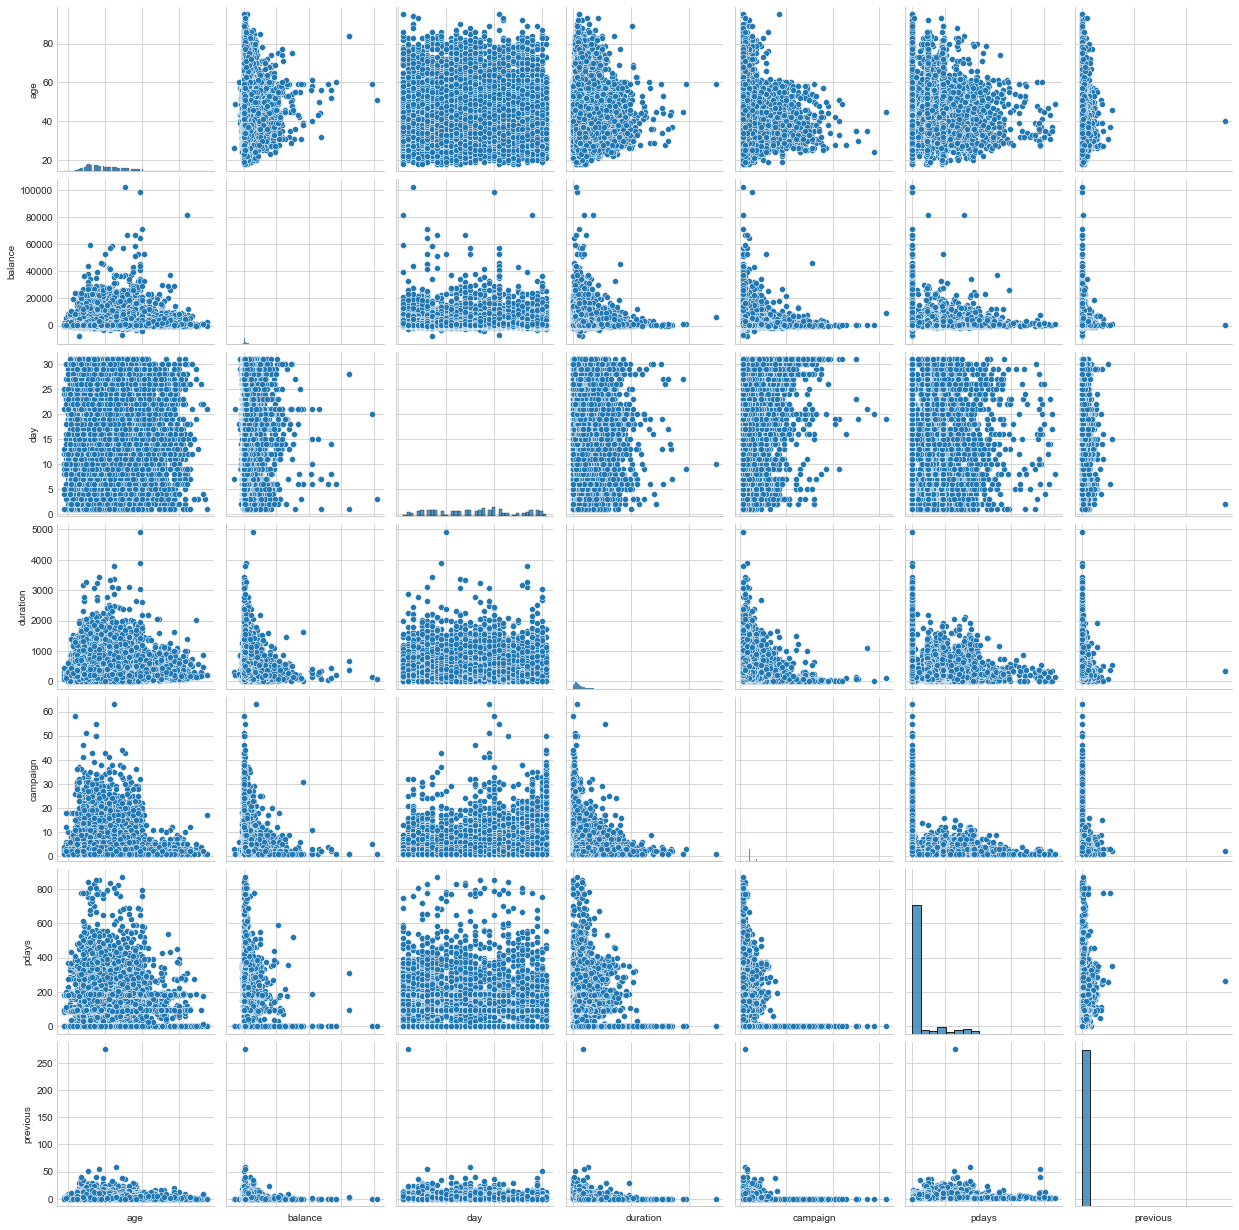

In [124]:
g = sns.pairplot(df )
g.set(xticklabels=[])
plt.show()

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-pack

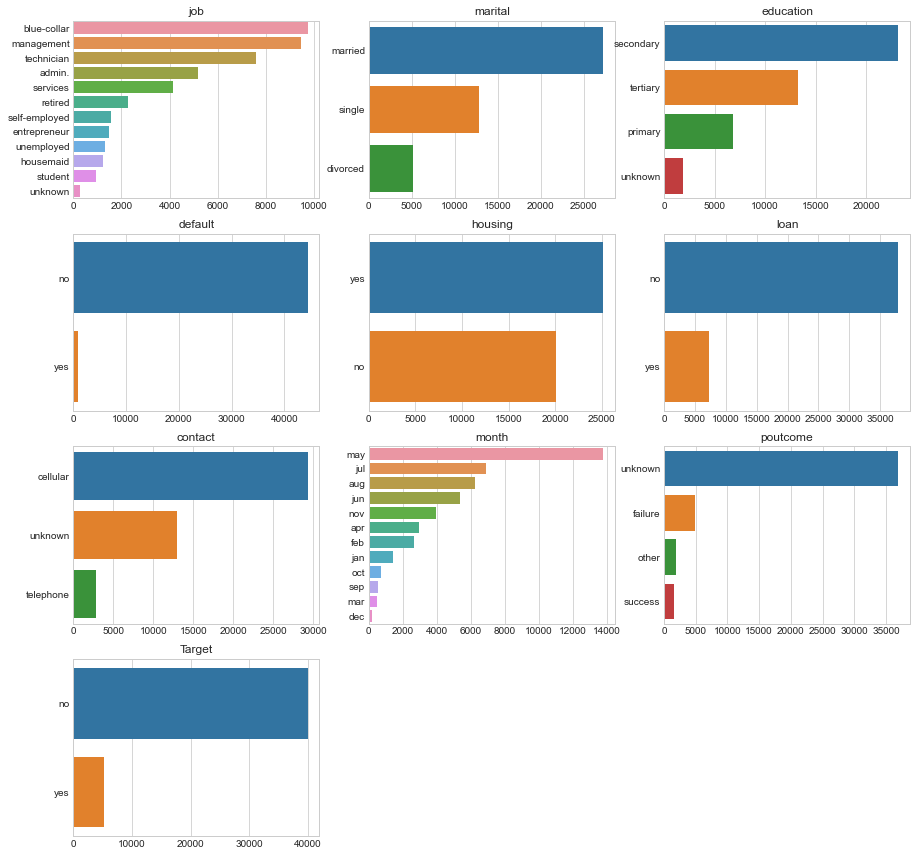

In [125]:
plt.figure(figsize=(15,15))
for i,col in enumerate(category_cols,start=1):
    plt.subplot(4,3,i);
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)

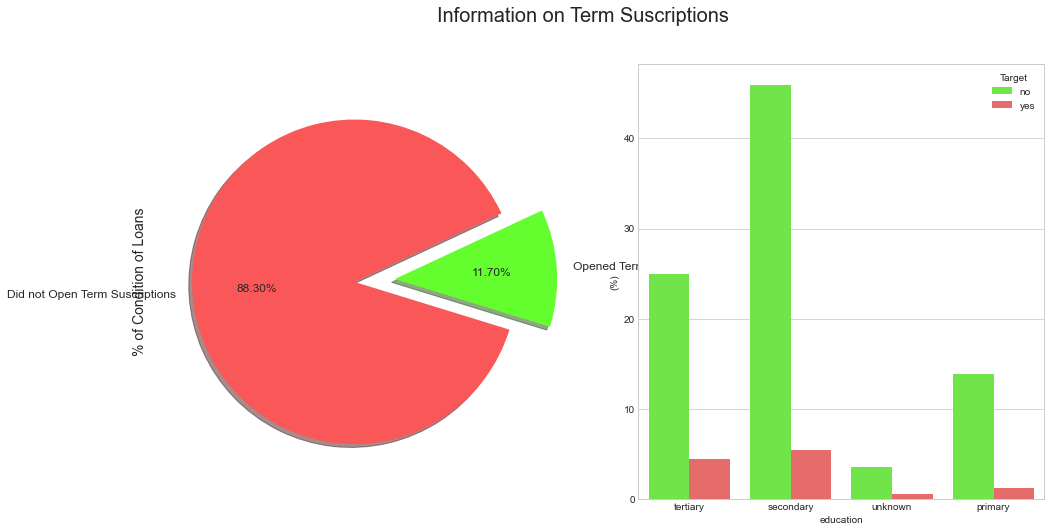

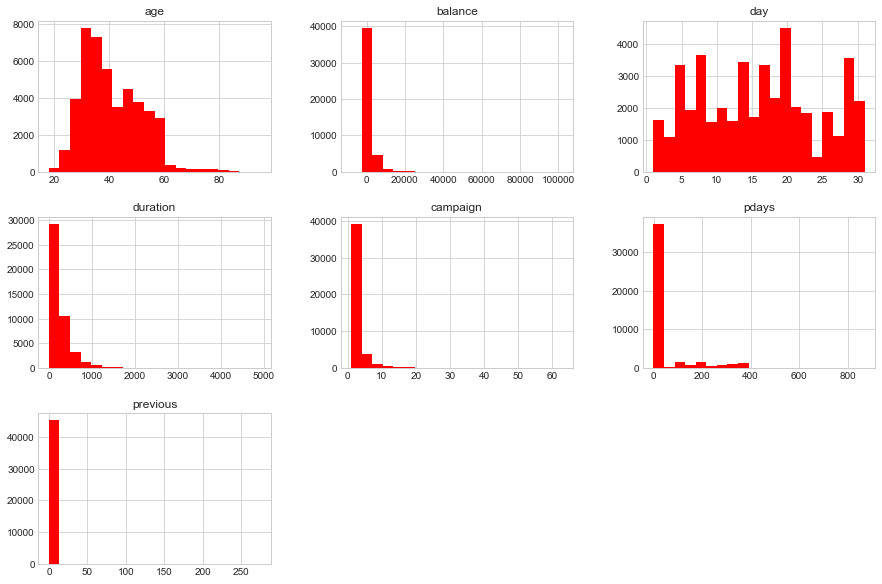

In [126]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

df["Target"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)

ax[0].set_ylabel('% of Condition of Loans', fontsize=14)
palette = ["#64FE2E", "#FA5858"]

sns.barplot(x="education", y="balance", hue="Target", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(df["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(15,10), color='red')
plt.show()

In [127]:
df["Target"].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

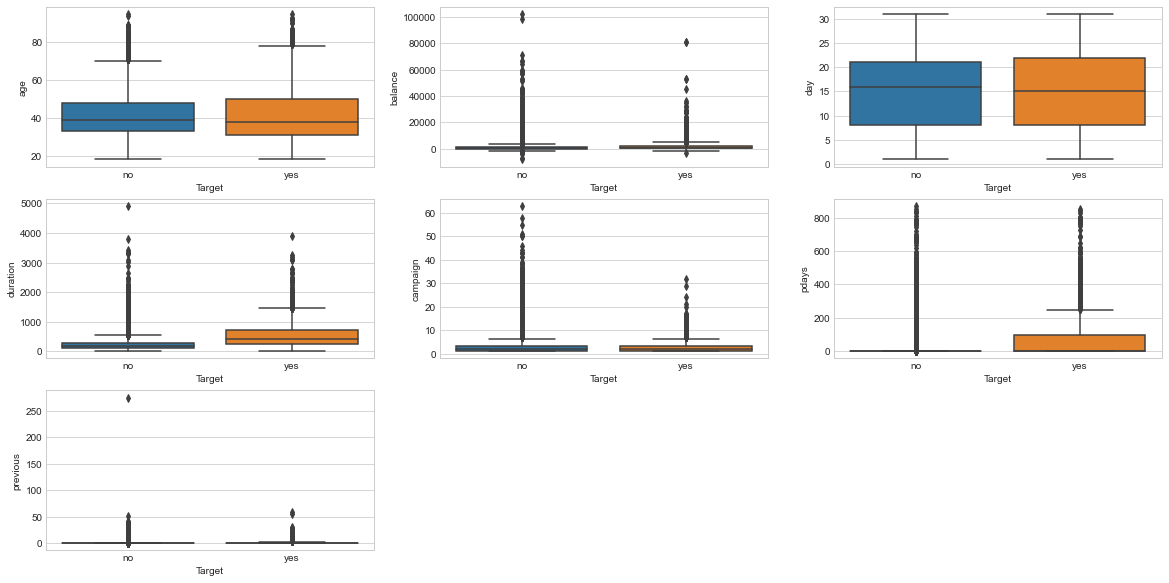

In [128]:
plt.figure(figsize=(20,10))
for i,col in enumerate(num_features,start=1):
    plt.subplot(3,3,i);
    sns.boxplot(y=df[col],x=df[target]);
plt.show()

In [129]:
df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'

df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'tertiary'
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 'secondary'
df.loc[(df['education']=='unknown') & (df['job']=='housemaid'), 'education'] = 'primary'

df.loc[(df['job'] == 'unknown') & (df['education']=='basic.4y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.6y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.9y'), 'job'] = 'blue-collar'
df.loc[(df['job']=='unknown') & (df['education']=='professional.course'), 'job'] = 'technician'
df['job'] = df.job.replace('unknown',df.job.mode()[0])
df['education'] = df.education.replace('unknown',df.education.mode()[0])
print("Other values count in attributes having unknown values -\n")
for col in col_with_unknown_value:
    print("===",col,"===")
    print(df.groupby(df[col])[col].count(),"\n")

Other values count in attributes having unknown values -

=== job ===
job
admin.           5171
blue-collar      9998
entrepreneur     1487
housemaid        1240
management       9458
retired          2286
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
Name: job, dtype: int64 

=== education ===
education
primary       6896
secondary    24772
tertiary     13543
Name: education, dtype: int64 

=== contact ===
contact
cellular     29285
telephone     2906
unknown      13020
Name: contact, dtype: int64 

=== poutcome ===
poutcome
failure     4901
other       1840
success     1511
unknown    36959
Name: poutcome, dtype: int64 



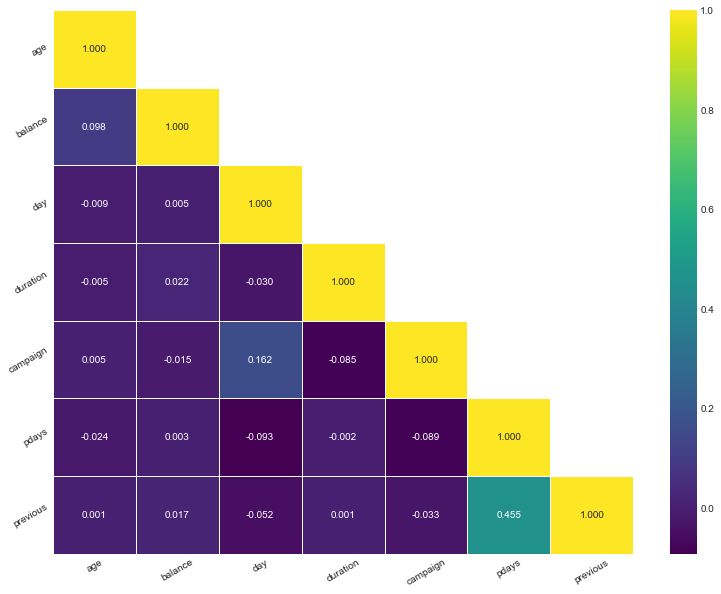

In [130]:
fig, ax = plt.subplots(figsize=(13,10))

mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask, 1)] = True

sns.heatmap(df.corr(), annot=True,mask=mask, cmap='viridis',linewidths=0.5,ax=ax, fmt='.3f')

rotx = ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
roty = ax.set_yticklabels(ax.get_yticklabels(), rotation=30)

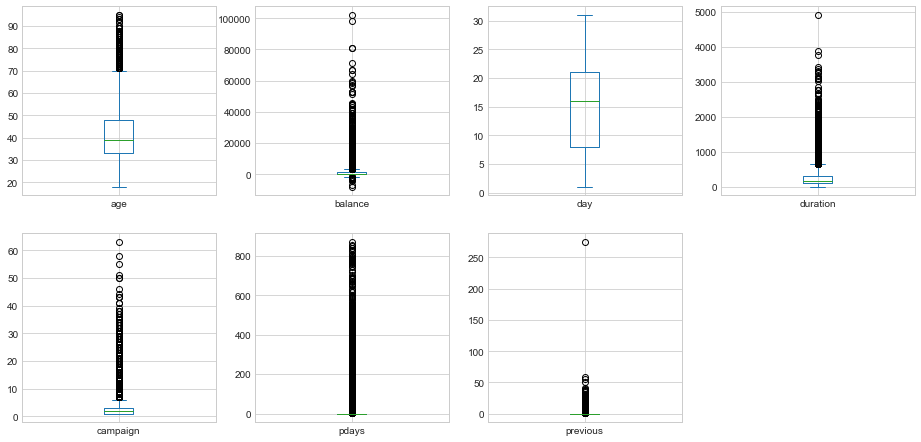

In [131]:
df[num_features].plot(kind='box',subplots=True, layout=(4,4), fontsize=10, figsize=(16,16));
plt.show()

In [132]:
withOutliers = ['age', 'balance', 'duration', 'campaign','pdays','previous']

IQR=df[withOutliers].describe().T['75%']-df[withOutliers].describe().T['25%']

LW,UW = df[withOutliers].describe().T['25%']-(IQR*1.5),df[withOutliers].describe().T['75%']+(IQR*1.5)


for i in withOutliers:
    df[i][df[i]>UW[i]]=UW[i];
    df[i][df[i]<LW[i]]=LW[i]

<ipython-input-132-56f6e22263a1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]>UW[i]]=UW[i];
<ipython-input-132-56f6e22263a1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]<LW[i]]=LW[i]
<ipython-input-132-56f6e22263a1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]>UW[i]]=UW[i];


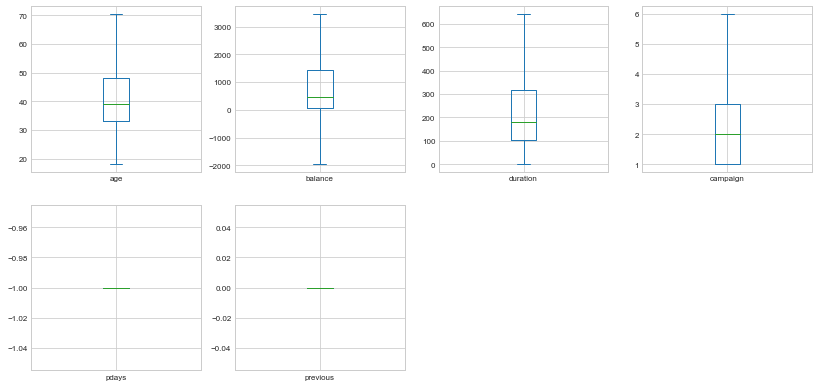

In [133]:
df[withOutliers].plot(kind='box',subplots=True, layout=(4,4), fontsize=8, figsize=(14,14));

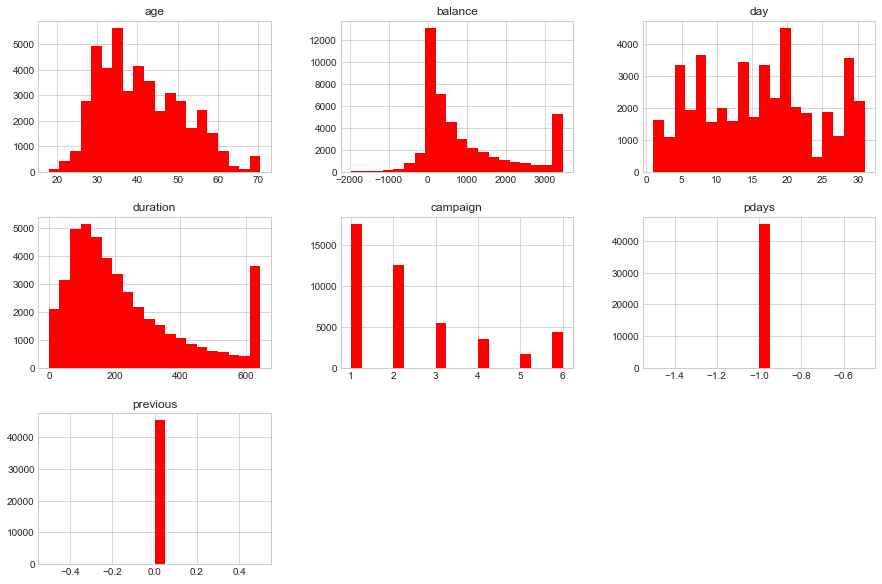

In [134]:
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(15,10), color='red')
plt.show() 

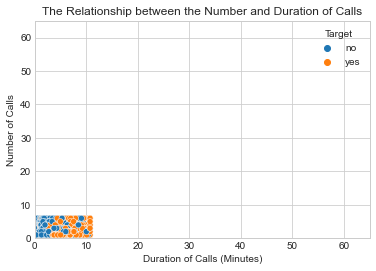

In [135]:
df['duration'] = df['duration'].apply(lambda n:n/60).round(2)
duration_campaign = sns.scatterplot(x='duration', y='campaign',data = df,
                     hue = 'Target')

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls')
plt.show()

In [136]:
print('Rows count having call duration less than 10 Sec -\t',df[df.duration < 10/60]['duration'].count())

Rows count having call duration less than 10 Sec -	 342


In [137]:
df = df.drop(df[df.duration < 10/60].index, axis = 0, inplace = False)
df.loc[df["age"] < 30,  'age'] = 20
df.loc[(df["age"] >= 30) & (df["age"] <= 39), 'age'] = 30
df.loc[(df["age"] >= 40) & (df["age"] <= 49), 'age'] = 40
df.loc[(df["age"] >= 50) & (df["age"] <= 59), 'age'] = 50
df.loc[df["age"] >= 60, 'age'] = 60
from sklearn.preprocessing import LabelEncoder
labelenc = LabelEncoder()
df[category_cols] = df[category_cols].apply(LabelEncoder().fit_transform)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,50.0,4,1,2,0,2143,1,0,2,5,8,4.35,1,-1,0,3,0
1,40.0,9,2,1,0,29,1,0,2,5,8,2.52,1,-1,0,3,0
2,30.0,2,1,1,0,2,1,1,2,5,8,1.27,1,-1,0,3,0
3,40.0,1,1,1,0,1506,1,0,2,5,8,1.53,1,-1,0,3,0
4,30.0,1,2,1,0,1,0,0,2,5,8,3.30,1,-1,0,3,0


<AxesSubplot:>

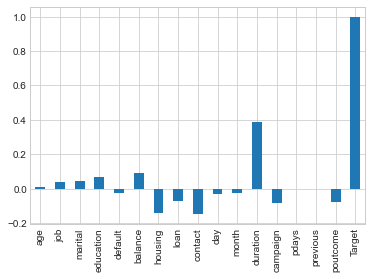

In [138]:
df.corr()['Target'][:].plot.bar()

Target Attribute distribution 

0    39581
1     5288
Name: Target, dtype: int64 



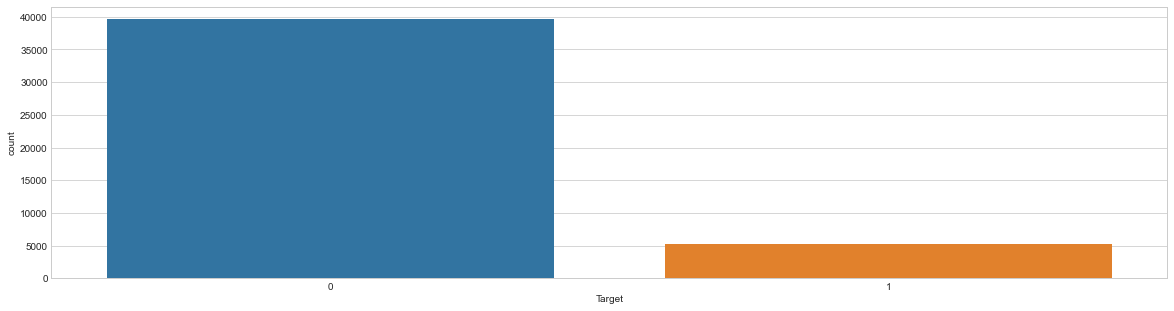

In [139]:
print("Target Attribute distribution \n")
print(df.Target.value_counts(),"\n")

fig,ax= plt.subplots()
fig.set_size_inches(20,5)
sns.countplot(x= "Target",data=df,ax= ax)
plt.show()

In [140]:
per_subs=round((df[df['Target'] == 1]['Target'].value_counts()[1]/df.Target.count())*100, 2)

print("% of clients subscribed for Term Deposite -\t",per_subs)

% of clients subscribed for Term Deposite -	 11.79


In [141]:
X = df.drop(['Target','contact','poutcome'],1)
y = df['Target']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=0)

print(X_train.shape)
print(X_test.shape)

(31408, 14)
(13461, 14)


<ipython-input-141-25300ff8a67f>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop(['Target','contact','poutcome'],1)


In [142]:
from sklearn.linear_model import LogisticRegression

lr_clf=LogisticRegression()

lr_clf.fit(X_train, y_train)

print("Training Accuracy :\t ", lr_clf.score(X_train, y_train))

print("Testing Accuracy :\t  ",  lr_clf.score(X_test, y_test))

y_pred = lr_clf.predict(X_test)

Training Accuracy :	  0.8819409067753439
Testing Accuracy :	   0.8783151326053042


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [143]:
metrics.confusion_matrix(y_pred, y_test)

array([[11585,  1390],
       [  248,   238]])

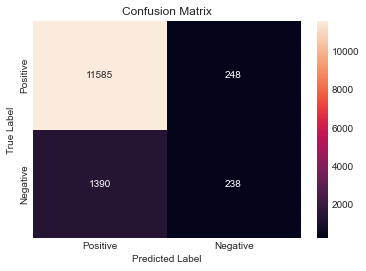

In [144]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Positive", "Negative"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [145]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     11833
           1       0.49      0.15      0.23      1628

    accuracy                           0.88     13461
   macro avg       0.69      0.56      0.58     13461
weighted avg       0.84      0.88      0.85     13461



In [146]:
y_predictProb = lr_clf.predict_proba(X_train)

fpr, tpr, thresholds = roc_curve(y_train, y_predictProb[::,1])

roc_auc = auc(fpr, tpr)

print("auc :-",roc_auc)

auc :- 0.8026380870457064


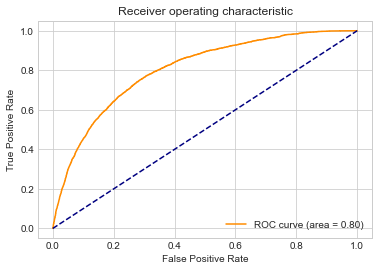

In [147]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

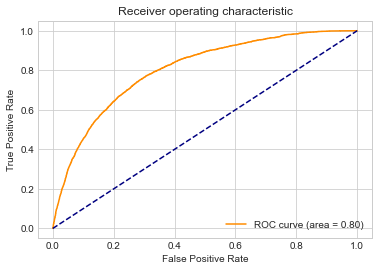

In [148]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [149]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


knn_clf = KNeighborsClassifier()

params_knn = {'n_neighbors': np.arange(1, 25)}

knn_gs = GridSearchCV(knn_clf, params_knn, cv=5)

knn_gs.fit(X_train, y_train)

print("Training Accuracy :\t ", knn_gs.score(X_train, y_train))

print("Testing Accuracy :\t  ",  knn_gs.score(X_test, y_test))

Training Accuracy :	  0.8838512480896586
Testing Accuracy :	   0.8790580194636357


In [150]:
knn_best = knn_gs.best_estimator_
print(knn_gs.best_params_)
knn_cm=metrics.confusion_matrix(y_test, knn_gs.predict(X_test))
knn_cm

{'n_neighbors': 24}


array([[11823,    10],
       [ 1618,    10]])

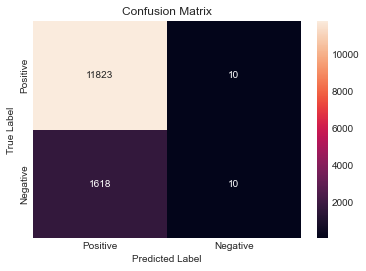

In [151]:
knn_cm=metrics.confusion_matrix(y_test, knn_gs.predict(X_test))

class_label = ["Positive", "Negative"]
df_cm = pd.DataFrame(knn_cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [152]:
print(classification_report(y_test, knn_gs.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11833
           1       0.50      0.01      0.01      1628

    accuracy                           0.88     13461
   macro avg       0.69      0.50      0.47     13461
weighted avg       0.83      0.88      0.82     13461



In [153]:
y_predictProb = knn_gs.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)
print("auc :-",roc_auc)

auc :- 0.7294312733867371


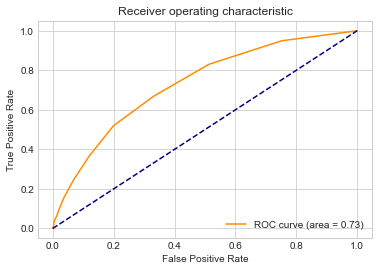

In [154]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [155]:
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
lr = LogisticRegression()

dt.fit(X_train,y_train)
knn.fit(X_train,y_train)
lr.fit(X_train,y_train)

dt_score=dt.score(X_test,y_test)
knn_score=knn.score(X_test,y_test)
lr_score=lr.score(X_test,y_test)

print("Accuracy Score of Decision Tree -\t",dt_score )
print("Accuracy Score of KNN  -\t",knn_score )
print("Accuracy Score of Logistic Regression -\t",lr_score )

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score of Decision Tree -	 0.8627145085803433
Accuracy Score of KNN  -	 0.8739321001411485
Accuracy Score of Logistic Regression -	 0.8783151326053042
